In [90]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [91]:
def get_ba_graph_paths(dataset_dir= "./datasets/"):
    graph_list = []
    for dirpath, _, files in os.walk(dataset_dir):
        for filename in files:
            try:
                if filename.startswith("ba_edgelist") and filename.endswith(".edges"):
                    file_path = os.path.join(dirpath, filename) 
                    graph_list.append((file_path, os.path.splitext(filename)[0]))
            except Exception as e: 
                print(e, f'{filename}')
    return graph_list

In [92]:
import networkx as nx
import pandas as pd

def get_graph_paths(dataset_dir= "./datasets/"):
    graph_list = []
    for dirpath, _, files in os.walk(dataset_dir):
        for filename in files:
            try:
                if filename.endswith(".edges"):
                    file_path = os.path.join(dirpath, filename) 
                    graph_list.append((file_path, os.path.splitext(filename)[0]))
            except Exception as e: 
                print(e, f'{filename}')
    return graph_list


def get_sir_graph_paths(net_name, num_b=3,  result_path = './datasets/SIR_Results/'):
    paths= []
    for i in range(num_b):
        sir_dir =os.path.join(result_path, net_name)
        sir_dir = os.path.join(sir_dir, f'{i}.csv')
        paths.append(sir_dir)
    return paths


def get_previously_sim_values(sir_graph_path):
    try:
        df = pd.read_csv(sir_graph_path)
        values = df['Node'].tolist()
        return values
    except OSError as e:
        return []

def getTotalNumNodes(net_name):
    graph_list = get_graph_paths()
    path = ''
    for tmp in graph_list:
        if tmp[1]==net_name:
            path = tmp[0]
            
    G = nx.read_edgelist(path, comments="%", nodetype=int)
    return G.number_of_nodes()


def getSimNumNodes(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    temp = [  len(get_previously_sim_values(path)) for path in sir_paths ]
    return (temp)


def getSortValue(net_edges_path):
    net_edges_path=net_edges_path[0]
    G = nx.read_edgelist(net_edges_path, comments="%", nodetype=int)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    return num_nodes+avg_degree

def getSubList(graphs, index, step):
    sublits = []
    for i in range(index, len(graphs), step):
        sublits.append(graphs[i])
    return sublits




def get_has_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    duplicates = []
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            # Check for duplicate Node values
            duplicate = df[df.duplicated(subset='Node', keep=False)]['Node'].unique()
            if len(duplicate)>0:
                duplicates.append(duplicate)
            else:
                duplicates.append([])
                
        except OSError as e:
            return []
    union_result = set(duplicates[0]).union(duplicates[1], duplicates[2])
    union_result = list(union_result)
    return True if len (union_result)>0 else False

def get_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    duplicates = []
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            # Check for duplicate Node values
            duplicate = df[df.duplicated(subset='Node', keep=False)]['Node'].unique()
            if len(duplicate)>0:
                duplicates.append(duplicate)
            else:
                duplicates.append([])
                
        except OSError as e:
            return []
    union_result = set(duplicates[0]).union(duplicates[1], duplicates[2])
    union_result = list(union_result)
    return union_result


In [93]:
temp = get_ba_graph_paths()
print(temp)
list.sort(temp, key=getSortValue)
print(temp)
ba_mch_0 = getSubList(temp, 0, 3)
ba_mch_1 = getSubList(temp, 1, 3)
ba_mch_2 = getSubList(temp, 2, 3)
print(len(ba_mch_0))
print(len(ba_mch_1))
print(len(ba_mch_2))

[('./datasets/BA\\ba_edgelist_1000_10.edges', 'ba_edgelist_1000_10'), ('./datasets/BA\\ba_edgelist_1000_20.edges', 'ba_edgelist_1000_20'), ('./datasets/BA\\ba_edgelist_1000_4.edges', 'ba_edgelist_1000_4'), ('./datasets/BA\\ba_edgelist_2000_10.edges', 'ba_edgelist_2000_10'), ('./datasets/BA\\ba_edgelist_2000_20.edges', 'ba_edgelist_2000_20'), ('./datasets/BA\\ba_edgelist_2000_4.edges', 'ba_edgelist_2000_4'), ('./datasets/BA\\ba_edgelist_3000_10.edges', 'ba_edgelist_3000_10'), ('./datasets/BA\\ba_edgelist_3000_20.edges', 'ba_edgelist_3000_20'), ('./datasets/BA\\ba_edgelist_3000_4.edges', 'ba_edgelist_3000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edg

## sort files



In [94]:

di = {}
di['BA_mch_0'] = [item[1] for item in ba_mch_0]
di['BA_mch_0'].append('ChicagoRegional')
di['BA_mch_0'].append('jazz')
di['BA_mch_0'].append('ia-crime-moreno')
di['BA_mch_0'].append('p2p-Gnutella04')

di['BA_mch_1'] = [item[1] for item in ba_mch_1]
di['BA_mch_1'].append('LastFM')
di['BA_mch_1'].append('sex')

di['BA_mch_2'] = [item[1] for item in ba_mch_2]
di['BA_mch_2'].append('maybe-PROTEINS-full')
di['BA_mch_2'].append('vidal')
di['BA_mch_2'].append('arenas-pgp')

di['negin_mch'] = ['CA-GrQc', 'CA-HepTh', 'faa', 'facebook_combined', 'figeys', 'email', 'NS', 'Peh_edge', 'Stelzl', 'tvshow_edges', 'web-EPA']
di['mhd_mch'] = [ ]

write_to_mch_json = False
if write_to_mch_json:
    with open('machine.json', 'w') as f:
        json.dump(di, f)

In [95]:

notsorted = [] 
noteq = []
completed = []
incomplete = []
temp = False
net_has_duplicate_name = []

for mch in di.keys():
    # if not mch=='BA_mch_1':
    #     continue
    print(mch, ": ")
    i = 0

    t_=0
    s_=0
    for net in di[mch]:
        has_duplicates = get_has_duplicates(net)
        temp = False
        i+=1
        simNodes = getSimNumNodes(net)
        totalNumNodes = getTotalNumNodes(net)
        t_+=totalNumNodes
        s_+=simNodes[0]
        sortd = sorted(get_previously_sim_values(get_sir_graph_paths(net)[0])) ==get_previously_sim_values(get_sir_graph_paths(net)[0])
        if simNodes[0] >= totalNumNodes:
            temp = True
            completed.append(net)
        else: 
            incomplete.append(net)
        if not sortd :
            notsorted.append(net)
            print('### ', i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd, '### ')
        elif not( simNodes[0]==simNodes[1] and simNodes[1]==simNodes[2]) :
            noteq.append(net)
            print('$$$ ', i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd, ('$$$ '))
        else:
            print( i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd)
        if has_duplicates:
            net_has_duplicate_name.append(net)
            print("@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates: ", get_duplicates(net))
    print("SIM NUM NODES / TOTAL NUM NODES: ",s_, ' / ', t_)
    try:
        print("percentage: ",(s_/ t_)*100)
    except ZeroDivisionError:
        print("percentage: ZeroDivisionError  :",s_, '/', t_ )

    print("COMPLETED: ", completed)
    print("INCOMPLETED: ", incomplete)

    completed=[]
    incomplete = []
    print("-----------------")


BA_mch_0 : 
1 . ba_edgelist_1000_4   process: [1000, 1000, 1000] / 1000 completed:  True  sorted: True
2 . ba_edgelist_2000_4   process: [2000, 2000, 2000] / 2000 completed:  True  sorted: True
###  3 . ba_edgelist_exp2_2000_10   process: [2009, 2009, 2009] / 2000 completed:  True  sorted: False ### 
@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates:  [np.int64(204), np.int64(205), np.int64(206), np.int64(207), np.int64(208), np.int64(20), np.int64(21), np.int64(29), np.int64(30)]
4 . ba_edgelist_3000_4   process: [3004, 3004, 3004] / 3000 completed:  True  sorted: True
@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates:  [np.int64(32), np.int64(33), np.int64(34), np.int64(35)]
###  5 . ba_edgelist_3000_20   process: [3023, 3023, 3023] / 3000 completed:  True  sorted: False ### 
@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates:  [np.int64(778), np.int64(779), np.int64(780), np.int64(781), np.int64(788), np.int64(789), np.int64(790), np.int64(791), np

## Sort and save

In [96]:
run = False


In [97]:
if run:
    for net in notsorted:
        sir_paths = get_sir_graph_paths(net)
        i = 0
        for path in sir_paths:
            i+=1
            df = pd.read_csv(path)
            df_sorted = df.sort_values(by='Node')
            df_sorted.to_csv(path, index=False)

## REMOVE full duplicate rows

In [98]:
print(net_has_duplicate_name)

['ba_edgelist_exp2_2000_10', 'ba_edgelist_3000_4', 'ba_edgelist_3000_20', 'ba_edgelist_exp3_4000_6', 'ba_edgelist_exp1_6000_4', 'p2p-Gnutella04', 'ba_edgelist_2000_10', 'ba_edgelist_exp2_2000_20', 'ba_edgelist_exp1_4000_4', 'ba_edgelist_exp1_8000_4', 'maybe-PROTEINS-full']


In [99]:

def remove_full_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file with explicit data types
            df = pd.read_csv(sir_graph_path, dtype={'Node': int, 'SIR': float, 'Infected_sum': int})
            
            # Remove fully duplicated rows, ensuring all columns are considered
            df_cleaned = df.drop_duplicates(subset=['Node', 'SIR', 'Infected_sum'])
            
            # Overwrite the original CSV file with the cleaned data
            df_cleaned.to_csv(sir_graph_path, index=False)
            original_count = len(df)
            cleaned_count = len(df_cleaned)
            if original_count > cleaned_count:
                print(f" + File {sir_graph_path} updated, fully duplicated rows removed.")
            else:
                print(f" - no FULLY duplicate rows in File {sir_graph_path}.")

        except OSError as e:
            print("Error reading file:", e)

if False:
    for net in net_has_duplicate_name:
        print("net: ", net)
        remove_full_duplicates(net)

In [100]:

def average_node_values(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            
            # Group by 'Node' and calculate the mean for the other columns
            df_avg = df.groupby('Node', as_index=False).mean()
            df_avg['Infected_sum'] = df_avg['Infected_sum'].astype(int)
            df_avg['SIR'] = df_avg['SIR'].round(5)
            
            # Overwrite the original CSV file with the averaged data
            df_avg.to_csv(sir_graph_path, index=False)
            
            print(f"CSV file {sir_graph_path} updated: Averaged rows for nodes with duplicate entries.")
            
        except OSError as e:
            print(f"Error reading file: {e}")
            
if False:
    for net in net_has_duplicate_name:
        print("net: ", net)
        average_node_values(net)

## Checking for precision

BA_mch_0 : 
ba_edgelist_1000_4
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 997
ba_edgelist_2000_4
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 2000
ba_edgelist_exp2_2000_10
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 2007
ba_edgelist_3000_4
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 1785
ba_edgelist_exp3_4000_6
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 2552
ba_edgelist_exp1_6000_4
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 817
this machine BA_mch_0 has to do 10158
BA_mch_1 : 
ba_edgelist_1000_10
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 986
ba_edgelist_exp2_2000_4
Values rounded to 5 digits after the point: 0
Values rounded to 3 digits after the point: 2000
ba_edge

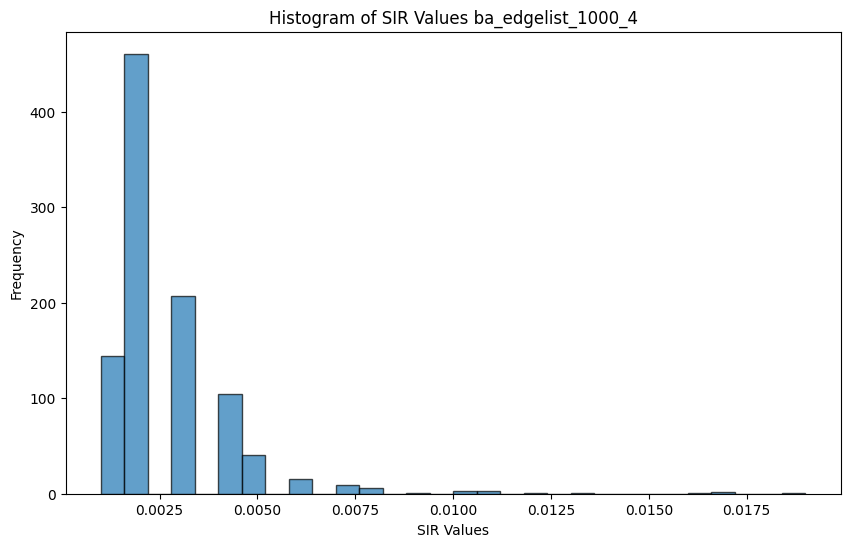

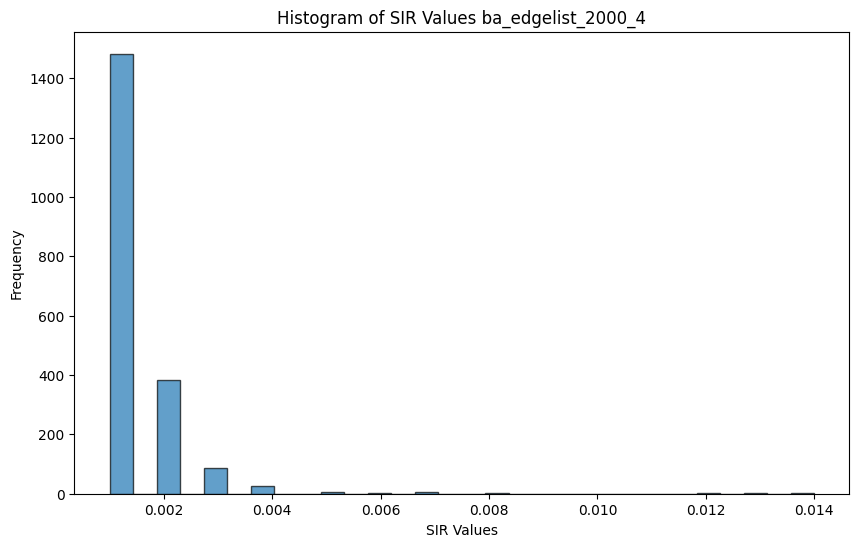

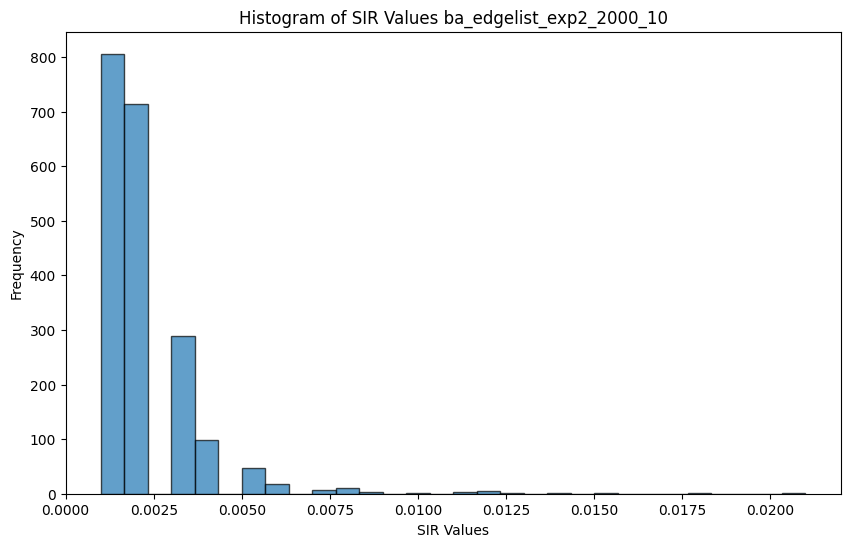

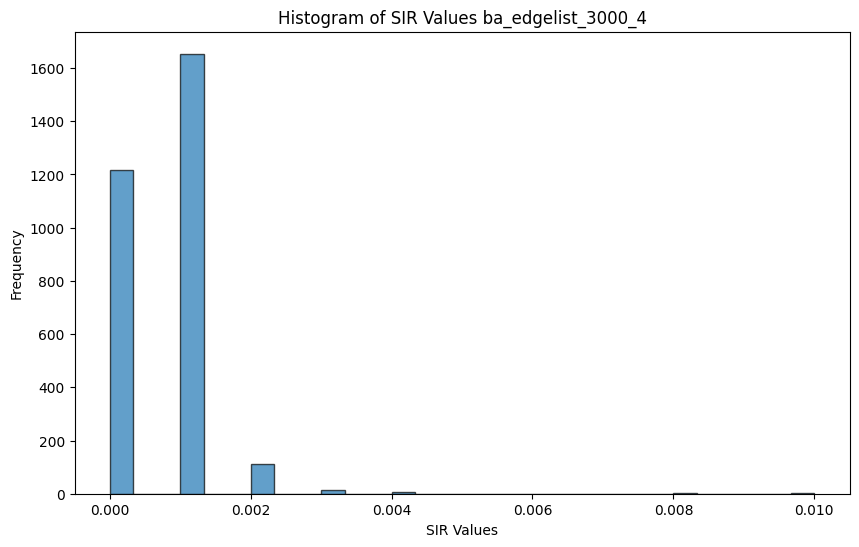

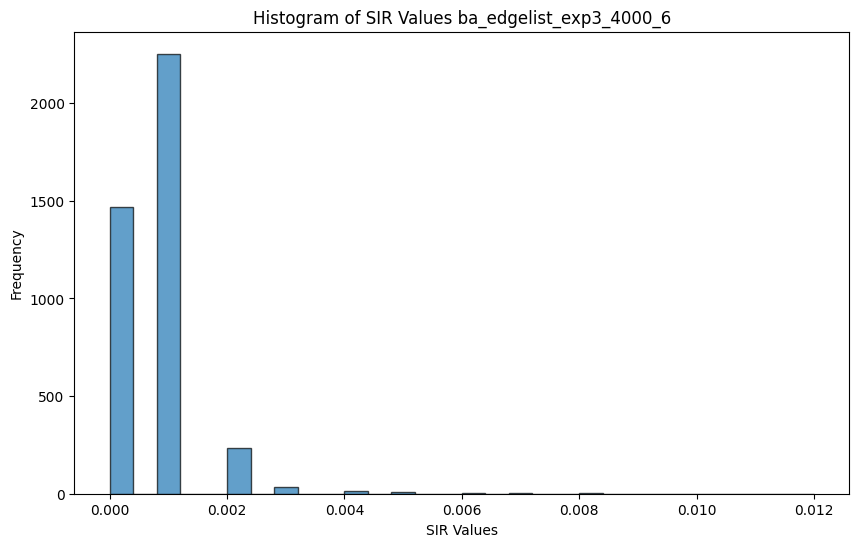

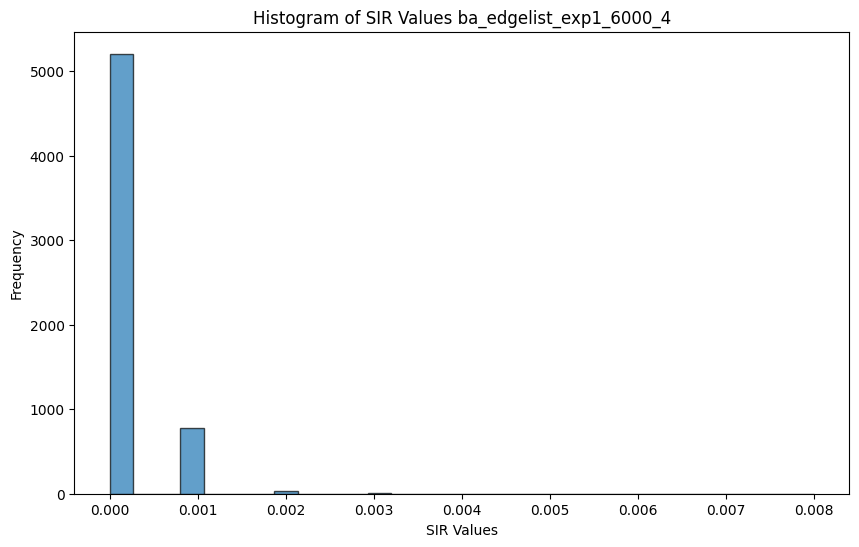

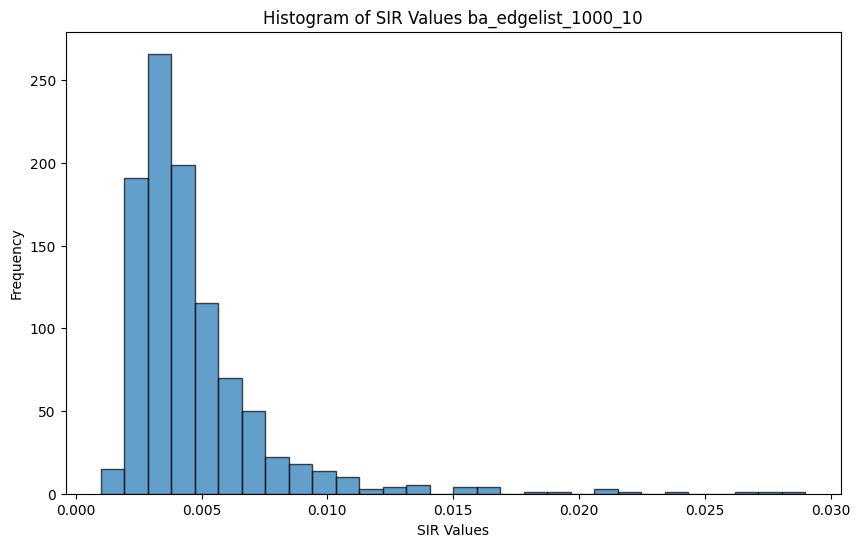

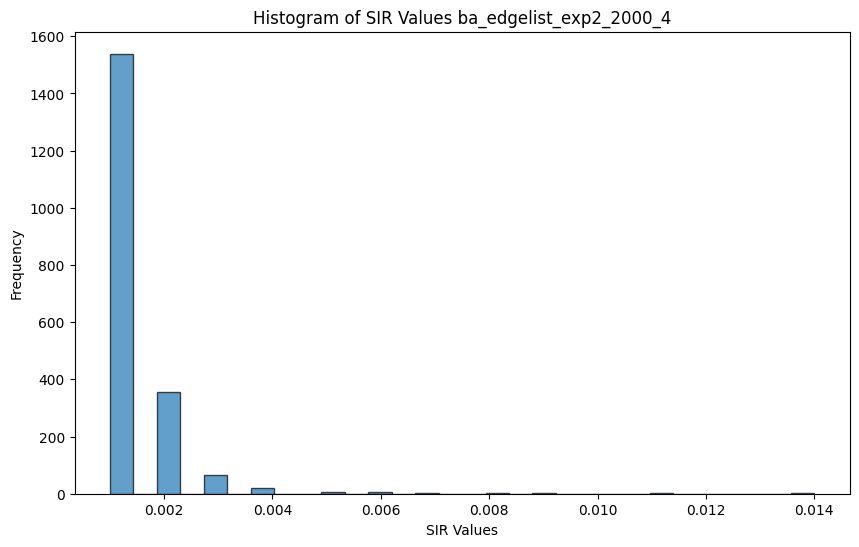

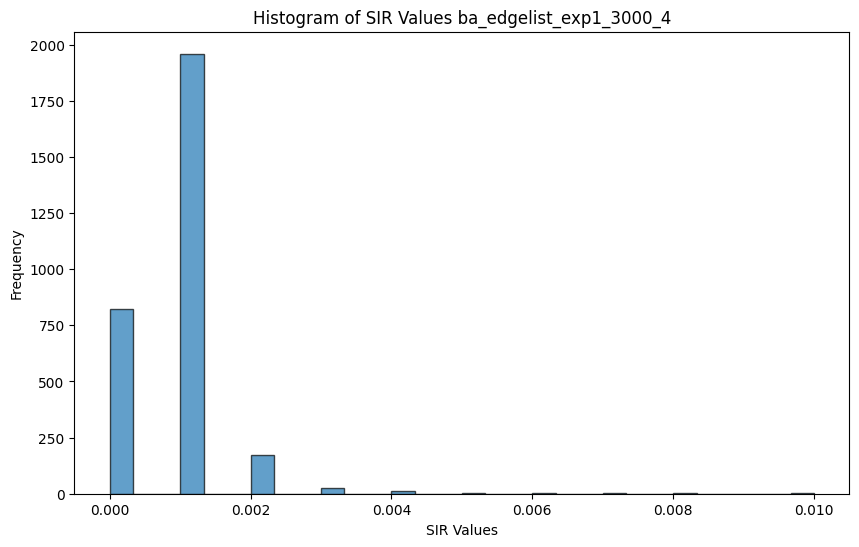

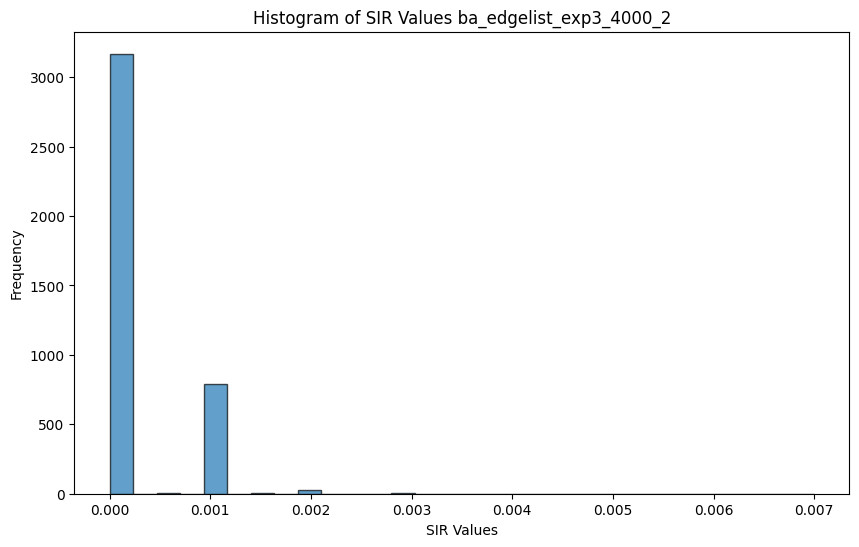

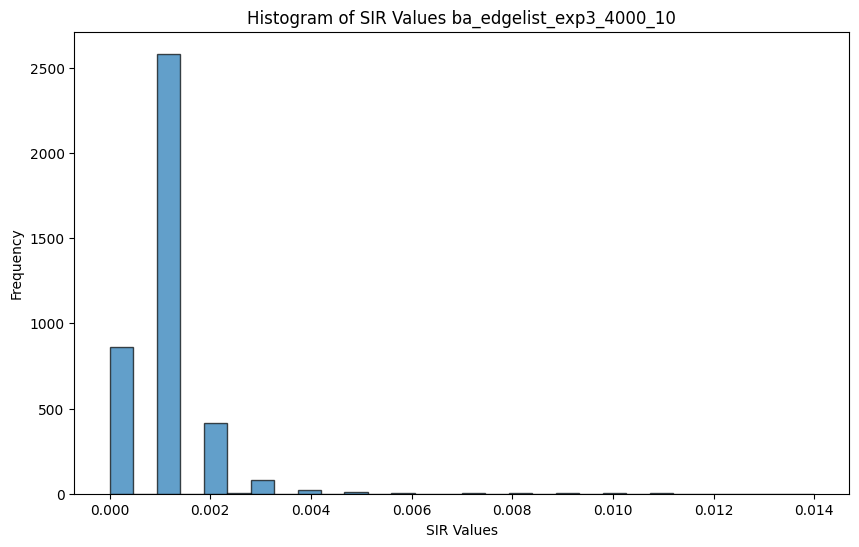

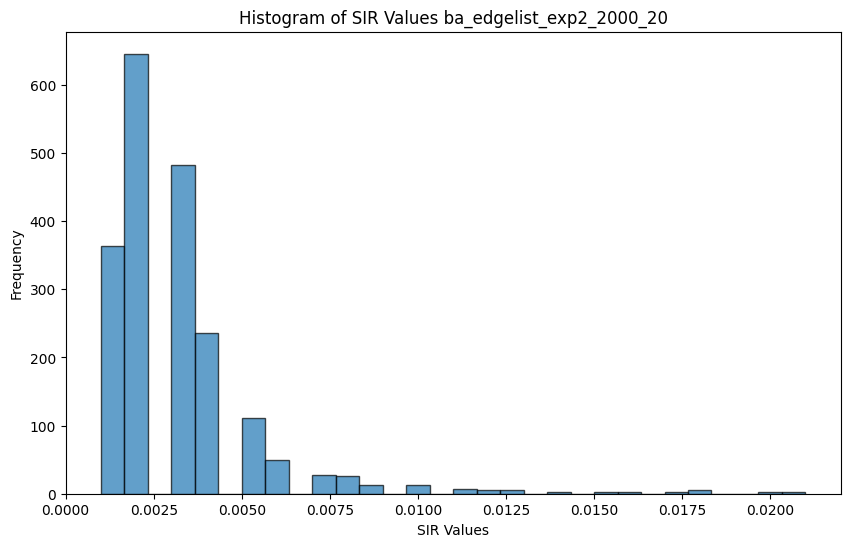

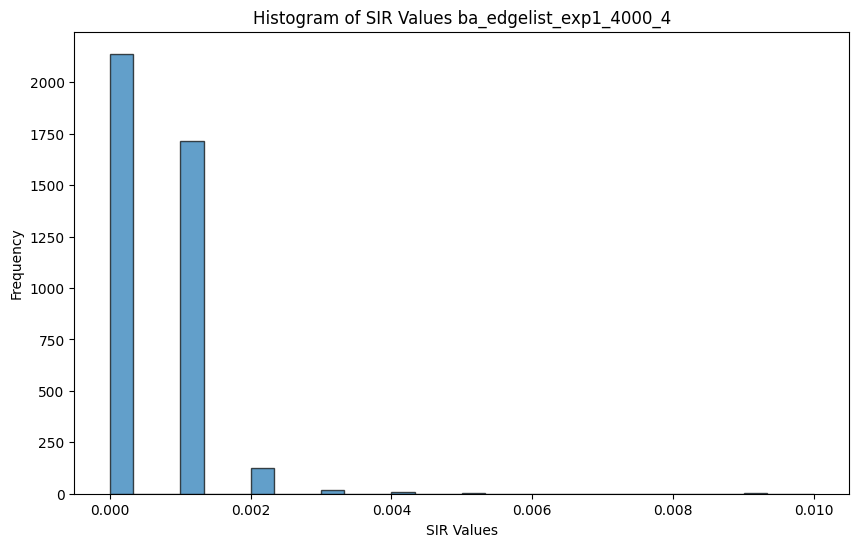

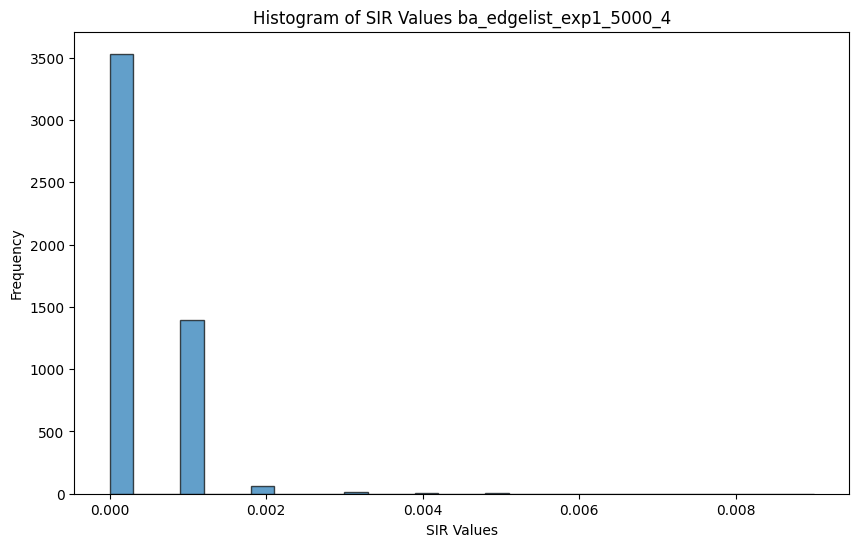

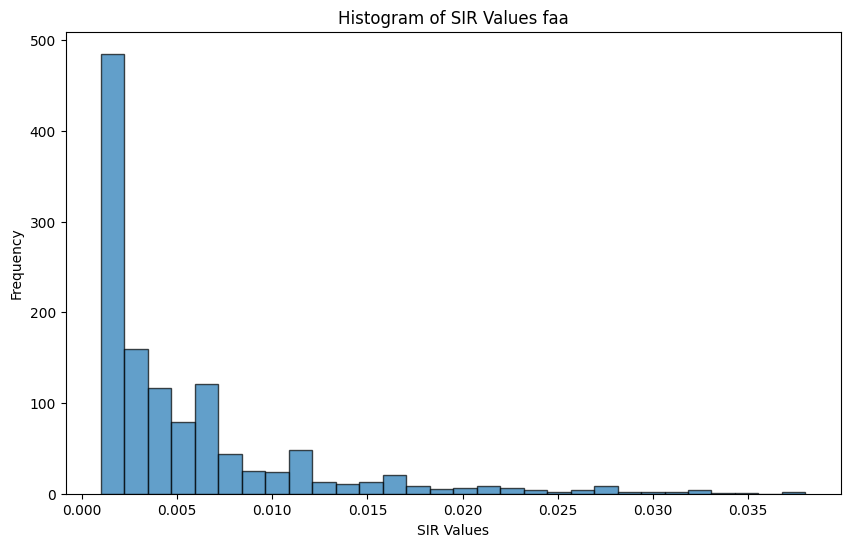

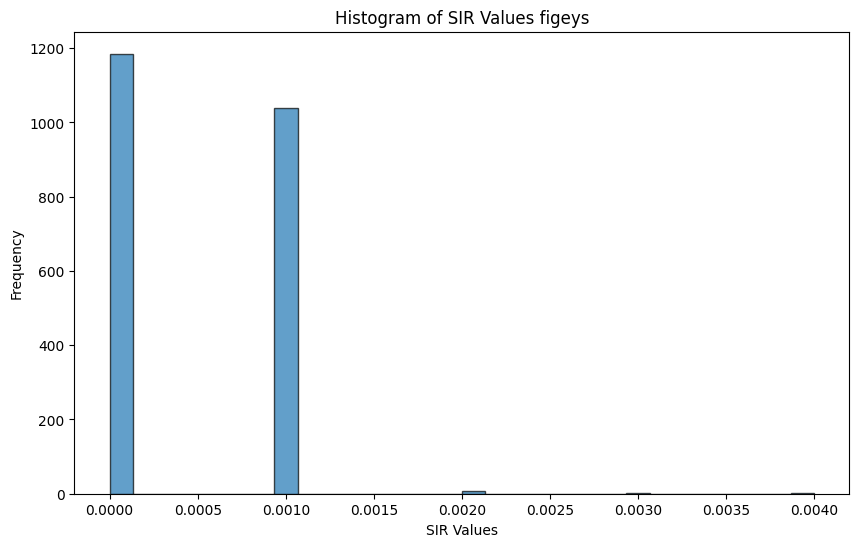

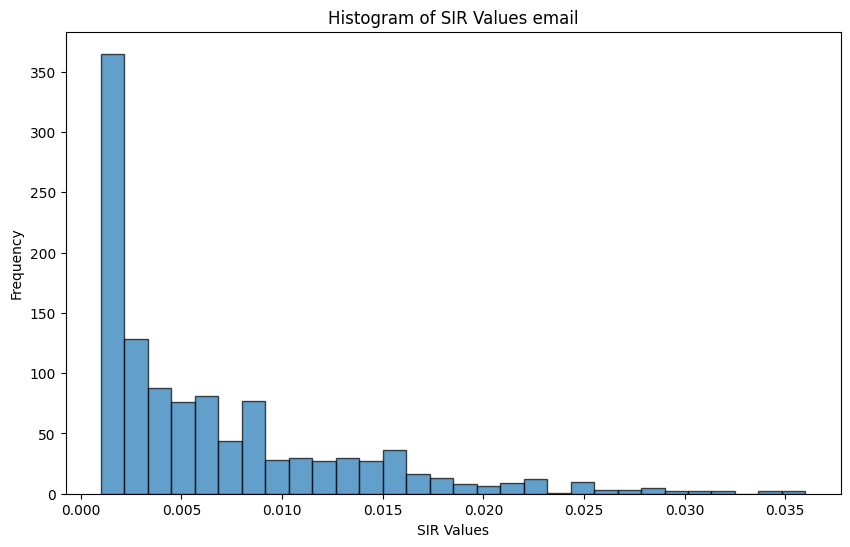

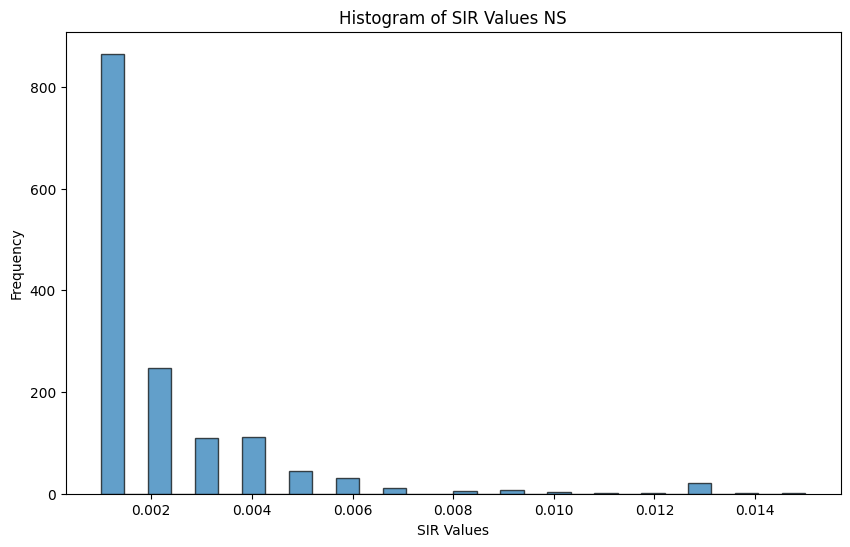

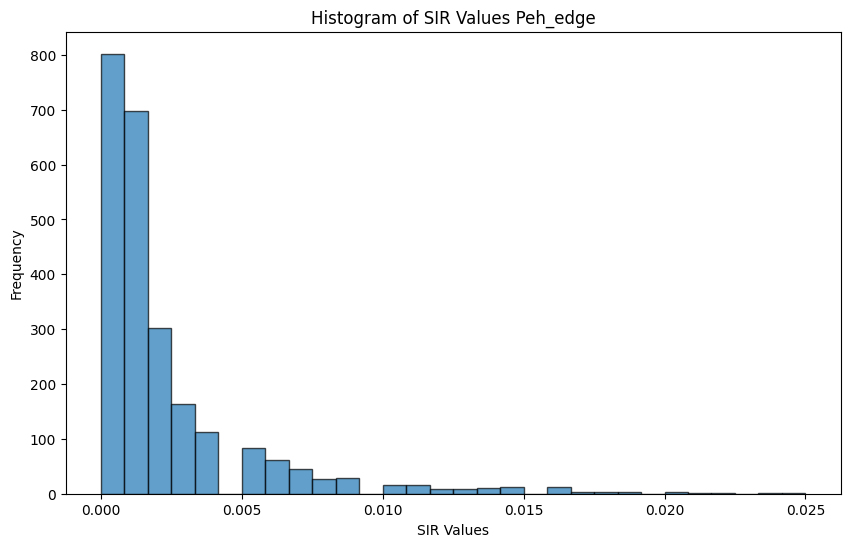

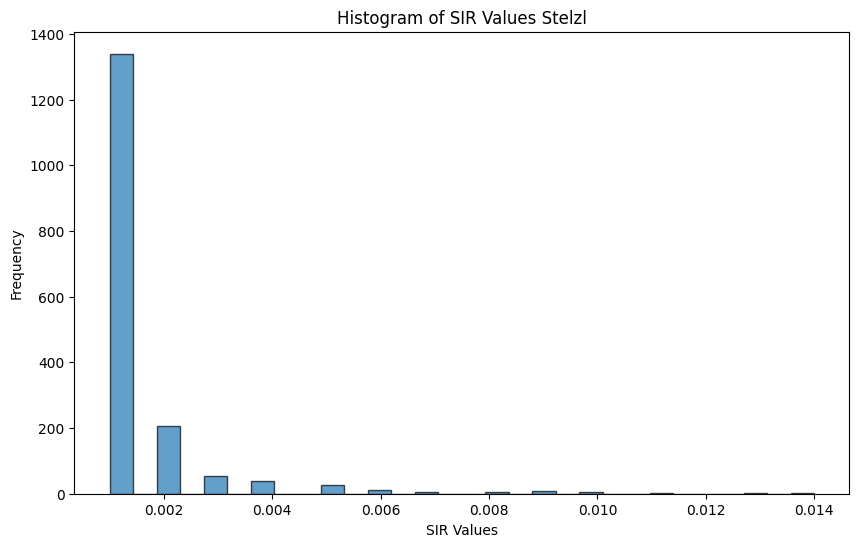

In [101]:

def check_sir_precision_and_plot(csv_file_path, name):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(csv_file_path)
    
    # Check if the 'SIR' column exists
    if 'SIR' not in data.columns:
        raise ValueError("The 'SIR' column does not exist in the provided CSV file.")

    # Extract the SIR values
    sir_values = data['SIR']
    
    # Check the precision of each value (5 or 3 decimal places)
    rounded_to_5 = sir_values.apply(lambda x: len(str(x).split(".")[1]) == 5 if "." in str(x) else False).sum()
    rounded_to_3 = sir_values.apply(lambda x: len(str(x).split(".")[1]) == 3 if "." in str(x) else False).sum()
    
    
    if rounded_to_3 == 0 or (rounded_to_3 > 0 and rounded_to_5 > 0) :
        return  0
    
    print(name)
    # Print the results
    print(f"Values rounded to 5 digits after the point: {rounded_to_5}")
    print(f"Values rounded to 3 digits after the point: {rounded_to_3}")

    # Plot the histogram of the SIR values
    plt.figure(figsize=(10, 6))
    plt.hist(sir_values, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of SIR Values {name}")
    plt.xlabel("SIR Values")
    plt.ylabel("Frequency")
    # plt.show()
    plt.savefig(f"./sir_labeling/images/prec_3/hist_sir_prec3_{name}.png", dpi=300, bbox_inches='tight')
    return rounded_to_3

# Example usage
# check_sir_precision_and_plot("path_to_your_csv_file.csv")


sum_redo_nodes = 0
for mch in di.keys():
    print(mch, ": ")
    mch_sum=0
    for net in di[mch]:
        sir_paths = get_sir_graph_paths(net)
        redo_nodes= check_sir_precision_and_plot(sir_paths[0], net)
        sum_redo_nodes+=redo_nodes
        mch_sum+=redo_nodes
    print(f"this machine {mch} has to do {mch_sum}")
print(sum_redo_nodes)


In [102]:
def remove_sir_with_3_digit_precision(csv_file_path, output_file_path):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(csv_file_path)
    
    # Check if the 'SIR' column exists
    if 'SIR' not in data.columns:
        raise ValueError("The 'SIR' column does not exist in the provided CSV file.")

    # Remove rows where 'SIR' values have 3 decimal places
    filtered_data = data[~data['SIR'].apply(lambda x: len(str(x).split(".")[1]) == 3 if "." in str(x) else False)]

    # Save the filtered DataFrame to a new CSV file
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Filtered data saved to {output_file_path}")


if False:

    for mch in di.keys():
        for net in di[mch]:
            sir_paths = get_sir_graph_paths(net)
            if check_sir_precision_and_plot(sir_paths[0], net)>0:
                remove_sir_with_3_digit_precision(sir_paths[0], sir_paths[0])
                remove_sir_with_3_digit_precision(sir_paths[1], sir_paths[1])
                remove_sir_with_3_digit_precision(sir_paths[2], sir_paths[2])
        print(f"this machine {mch} has to do {mch_sum}")
    print(sum_redo_nodes)
